In [ ]:
import keras
print(keras.__version__) # 케라스 버전확인

2.9.0


In [ ]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # 상위 10000개의 단어만 사용. 10000개의 차원.

In [ ]:
train_data.shape

(25000,)

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]   # 1 긍정 0 부정 -> 이진분류 문제

1

In [ ]:
# 숫자를 문자로 복원

word_index = imdb.get_word_index()
word_index.items()
reverse_word_index = dict([value, key] for (key, value) in word_index.items()) # for문 안에서 돌아가는 dict타입으로 변경 후 변수에 대입. 한줄 for문
type(reverse_word_index)

dict

In [ ]:
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])   
# 숫자값 0, 1, 2 까지는 특수문자로 되어있고 표현도 불가능. 그 불가능한 표현을 '?'로 치환시킨 것이다. 
# 이 특수문자들을 회피하기위해 -3을 하여 음의 변수가 되어버리도록 한 것이다. 음의 변수는 키에 없으니 키에 없는 값은 '?'로 치환시켜서 나타내라.  
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
# 데이터를 준비

import numpy as np

def vectorize_sequences(sequences, dimension=10000):  # default = 10000
  results = np.zeros((len(sequences),dimension))  # 0으로 가득찬 배열 생성 행 25000 열 10000
  
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1

  return results

# 데이터의 Encoding
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [ ]:
print(X_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [ ]:
# float type으로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(train_labels).astype('float32')

In [ ]:
# 번외 # enumerate함수 : index 번호를 주고 싶을 때 사용.
for i, c in enumerate(['A','B','C'], start=1):
  print(i, c)

temp = enumerate(['A','B','C'])  # 튜플 타입
next(temp)
next(temp)
next(temp)

1 A
2 B
3 C


(2, 'C')

In [ ]:
# 신경망의 구축

from keras import models
from keras import layers

model = models.Sequential()     # medel or networt 라고 명
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))   # 레이어 추가
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.0001), # 제약조건
              loss='binary_crossentropy', # 이진분류 손실 값 계산
              metrics=['accuracy'])

In [ ]:
x_val = X_train[:10000]   # 25000개 중 10000개
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=20,  # 학습20번
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 66ms/step - loss: 0.5012 - accuracy: 0.7864 - val_loss: 0.3744 - val_accuracy: 0.8714
Epoch 2/20
30/30 [==============================] - 1s 46ms/step - loss: 0.2916 - accuracy: 0.9063 - val_loss: 0.3109 - val_accuracy: 0.8770
Epoch 3/20
30/30 [==============================] - 1s 46ms/step - loss: 0.2160 - accuracy: 0.9267 - val_loss: 0.2761 - val_accuracy: 0.8903
Epoch 4/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1686 - accuracy: 0.9457 - val_loss: 0.2865 - val_accuracy: 0.8850
Epoch 5/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1366 - accuracy: 0.9549 - val_loss: 0.2919 - val_accuracy: 0.8837
Epoch 6/20
30/30 [==============================] - 2s 55ms/step - loss: 0.1164 - accuracy: 0.9627 - val_loss: 0.2987 - val_accuracy: 0.8851
Epoch 7/20
30/30 [==============================] - 2s 62ms/step - loss: 0.0941 - accuracy: 0.9719 - val_loss: 0.3160 - val_accuracy: 0.8827
Epoch 8/20
30

In [ ]:
# 실험 결과 데이터 가져오기

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)     # 1부터 시작.

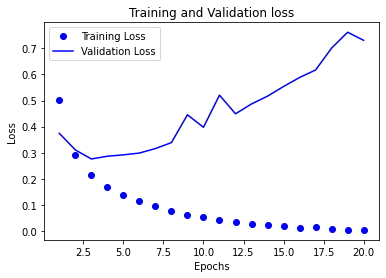

In [ ]:
# 실험 결과 시각화
import matplotlib.pyplot  as plt

plt.plot(epochs, loss, 'bo', label='Training Loss') # 학습 손실
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')   # 검증 정확도(제일 중요)
plt.title('Training and Validation loss')
plt.xlabel('Epochs')  # 반복 횟수
plt.ylabel('Loss')  # 손실값
plt.legend()  # 각주

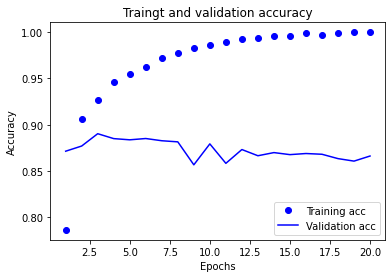

In [ ]:
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b-', label = 'Validation acc')
plt.title('Traingt and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=3,  # 학습20번
                    batch_size=256,
                    validation_data=(x_val, y_val))

Epoch 1/3
59/59 [==============================] - 3s 43ms/step - loss: 0.0352 - accuracy: 0.9921 - val_loss: 0.4150 - val_accuracy: 0.8756
Epoch 2/3
59/59 [==============================] - 2s 28ms/step - loss: 0.0330 - accuracy: 0.9925 - val_loss: 0.4220 - val_accuracy: 0.8767
Epoch 3/3
59/59 [==============================] - 2s 32ms/step - loss: 0.0312 - accuracy: 0.9931 - val_loss: 0.4305 - val_accuracy: 0.8762
